In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/Dominika/Desktop/IiE/Uczenie maszynowe/stroke.csv", sep=';')

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)
df = df.astype(int, errors='ignore')

print(df.head())

   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0             0              1             1               1   
1       0  61.0             0              0             1               0   
2       1  80.0             0              1             1               0   
3       0  49.0             0              0             1               1   
4       0  79.0             1              0             1               0   

   avg_glucose_level   bmi  stroke  work_type_Never_worked  work_type_Private  \
0             228.69  36.6       1                       0                  1   
1             202.21   NaN       1                       0                  0   
2             105.92  32.5       1                       0                  1   
3             171.23  34.4       1                       0                  1   
4             174.12  24.0       1                       0                  0   

   work_type_Self-employed  work_type_childr

In [ ]:
# Usuwanie danych brakujących
df_clean = df.dropna()
print(df_clean.shape)

(4908, 16)


In [8]:
X = df_clean.drop('stroke', axis=1)
y = df_clean['stroke']

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Undersampling zbioru treningowego
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print(pd.Series(y_train_res).value_counts())

stroke
0    146
1    146
Name: count, dtype: int64


In [10]:
# regresja logistyzcna 
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
# Przpisywanie klas do zbioru uczącego
y_pred = lr_model.predict(X_test) 
print(y_pred[:10])

[0 0 0 0 1 0 1 0 1 0]


In [12]:
# Ocena prawdopodobieństw przynależności do klas
y_prob = lr_model.predict_proba(X_test)  
print(y_prob[:10,])

[[0.91324424 0.08675576]
 [0.95933658 0.04066342]
 [0.99214393 0.00785607]
 [0.93253935 0.06746065]
 [0.36036234 0.63963766]
 [0.65901163 0.34098837]
 [0.10073007 0.89926993]
 [0.91942218 0.08057782]
 [0.35401825 0.64598175]
 [0.93115356 0.06884644]]


In [13]:
# współczynniki regresji
coefficients = lr_model.coef_
intercept = lr_model.intercept_
print(coefficients)

[[ 0.02354638  0.08038303  1.07430942  0.19812648 -0.66251863  0.01390897
   0.00810838  0.00847576  0.         -0.11912241  0.29889736 -0.22576474
   0.46332541  0.25211564  0.41001673]]


In [14]:
# wyraz wolny
print(intercept)

[-5.80673928]


In [15]:
# Predykcje prawdopodobieństw
y_prob_1 = lr_model.predict_proba(X_train)[:, 1]  

threshold = 0.5
y_pred_custom_1 = (y_prob_1 >= threshold).astype(int)

print("Predykcje przy progu 0.5:", y_pred_custom_1[:10])

Predykcje przy progu 0.5: [0 1 1 1 0 0 0 0 0 0]


In [16]:
# Macierz pomyłek dla progu 0.5 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_train, y_pred_custom_1)
print("Macierz pomyłek:\n", cm)


Macierz pomyłek:
 [[2494  795]
 [  27  119]]


In [17]:
# Predykcje prawdopodobieństw
y_prob = lr_model.predict_proba(X_test)[:, 1]  

# Próg odcięcia 
threshold = 0.5  
# Przyspisywanie klas na podstawie progu
y_pred_custom = (y_prob >= threshold).astype(int)

print("Predykcje przy progu 0.5:", y_pred_custom[:10])

Predykcje przy progu 0.5: [0 0 0 0 1 0 1 0 1 0]


In [18]:
# Macierz pomyłek dla progu 0.5
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_custom)
print("Macierz pomyłek:\n", cm)


Macierz pomyłek:
 [[1070  340]
 [  19   44]]


In [23]:
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred_custom))


Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      1410
           1       0.11      0.70      0.20        63

    accuracy                           0.76      1473
   macro avg       0.55      0.73      0.53      1473
weighted avg       0.95      0.76      0.83      1473



# Pytania:
#### Jakie są założenie regresji logistycznej?
Regresja logistyczna zakłada, że zmienna objaśniana jest binarna, a obserwacje są od siebie niezależne. Logit prawdopodobieństwa (log(p/(1−p))) ma liniową zależność od zmiennych objaśniających, które nie powinny być silnie ze sobą skorelowane. Dodatkowo zakłada brak istotnych obserwacji odstających i wystarczająco dużą liczebność próby.
#### Jak metoda ta radzi sobie ze zmiennymi kategorycznymi?
Regresja logistyczna wymaga, aby zmienne kategoryczne zostały przekształcone na numeryczne, np za pomocą one-hot encodingu. Zmienia on zmienne na binarne, co pozwala modelowi poprawnie uwzględniać ich wpływ na wynik końcowy. 
#### Czy w przypadku regresji logistycznej konieczna jest standaryzacja danych?
Przy tym modelu standaryzacja nie jest wymagana, ale jest zalecana. Ułatwia to estymację ich współczynników i poprawia stabilność obliczeń. 
#### Czy wartości odstające mają wpływ na uzyskiwane tą metodą wyniki? Zweryfikować to budując modele w oparciu o różne zestawy danych wejściowych (z wartościami i bez wartości odstających).
Tak, wartości odstające mogą silnie wpływać na wyniki. Zaburzają one estymacje współczynników i pogarszają jakość predykcji. 
#### W jaki sposób należy interpretować wyniki (wartości parametrów) uzyskiwane w regresji logistycznej? Przedstawić i zinterpretować wartości parametrów uzyskane podczas budowy modelu regresji logistycznej.
W regresji logistycznej wartości współczynników opisują wpływ zmiennych objaśniających na logit prawdopodobieństwa. Dodatni współczynnik oznacza, że wzrost danej zmiennej zwiększa szanse przynależności do klasy 1, a ujemny – zmniejsza.

In [20]:
# naive bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [21]:
# Predykcja na zbiorze testowym
y_pred = nb_model.predict(X_test)
print(y_pred[:10])

[1 0 0 1 1 1 1 1 1 1]


In [22]:
y_prob = nb_model.predict_proba(X_test)
print(y_prob[:10])

[[2.63464071e-01 7.36535929e-01]
 [7.48642574e-01 2.51357426e-01]
 [1.00000000e+00 0.00000000e+00]
 [3.70028656e-01 6.29971344e-01]
 [1.13835005e-03 9.98861650e-01]
 [2.20537348e-01 7.79462652e-01]
 [3.75674100e-08 9.99999962e-01]
 [2.39997469e-01 7.60002531e-01]
 [9.94840071e-03 9.90051599e-01]
 [3.01515081e-01 6.98484919e-01]]


In [70]:
print("\nMacierz pomyłek (testowy):")
print(confusion_matrix(y_test, y_pred))
print("\nRaport klasyfikacji (testowy):")
print(classification_report(y_test, y_pred, digits=4))


Macierz pomyłek (testowy):
[[546 864]
 [  1  62]]

Raport klasyfikacji (testowy):
              precision    recall  f1-score   support

           0     0.9982    0.3872    0.5580      1410
           1     0.0670    0.9841    0.1254        63

    accuracy                         0.4128      1473
   macro avg     0.5326    0.6857    0.3417      1473
weighted avg     0.9583    0.4128    0.5395      1473



In [63]:
# predykcje na zbiorze treningowym
y_pred_train = nb_model.predict(X_train)
print( y_pred_train[:10])


[1 1 1 1 1 1 0 1 1 1]


In [64]:
y_prob_train = nb_model.predict_proba(X_train)
print(y_prob_train[:10])


[[2.45787442e-03 9.97542126e-01]
 [5.74507609e-07 9.99999425e-01]
 [9.85717532e-04 9.99014282e-01]
 [8.36535472e-11 1.00000000e+00]
 [1.35015931e-01 8.64984069e-01]
 [2.22157779e-04 9.99777842e-01]
 [1.00000000e+00 0.00000000e+00]
 [4.57769306e-02 9.54223069e-01]
 [9.81283675e-02 9.01871633e-01]
 [2.36698382e-02 9.76330162e-01]]


In [71]:
print("\nMacierz pomyłek (treningowy):")
print(confusion_matrix(y_train, y_pred_train))
print("\nRaport klasyfikacji (treningowy):")
print(classification_report(y_train, y_pred_train, digits=4))


Macierz pomyłek (treningowy):
[[1182 2107]
 [   0  146]]

Raport klasyfikacji (treningowy):
              precision    recall  f1-score   support

           0     1.0000    0.3594    0.5287      3289
           1     0.0648    1.0000    0.1217       146

    accuracy                         0.3866      3435
   macro avg     0.5324    0.6797    0.3252      3435
weighted avg     0.9603    0.3866    0.5114      3435



# Pytania:
#### Czy tę metodę można stosować przy zmiennych kategorycznych i ilościowych?
Tak, metoda Naiwnego Bayesa może byc stosowana zarówno przy zmiennych kategorycznych jak i ilościowych. Należy dobrać odpowiedni wariant klasyfikaora: 
GaussianNB - dla zmiennych ciągłych (ilościowych), zakłada rozkład normalny, użyliśmy w tym przypadku, ponieważ większość cech jest ciągła lub binarna, 
MultinomiaNB - dla zmiennych dyskretnych liczbowych (liczba zdarzeń), 
BernoulliNB - dla zmiennych binarnych

In [81]:
# Predykcje prawdopodobieństw dla klasy 1
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Obliczenie AUC
auc_lr = roc_auc_score(y_test, y_prob_lr)  # regresja logistyczna
print(f'AUC dla regresji logistycznej: {auc_lr}')
auc_nb = roc_auc_score(y_test, y_prob_nb)  # Naiwny Bayes
print(f'AUC dla Naiwnego Bayesa {auc_nb}')   

AUC dla regresji logistycznej: 0.8134864347630305
AUC dla Naiwnego Bayesa 0.7920916357086569


In [75]:
# ROC dla regresji logistycznej
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# ROC dla Naiwnego Bayesa
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

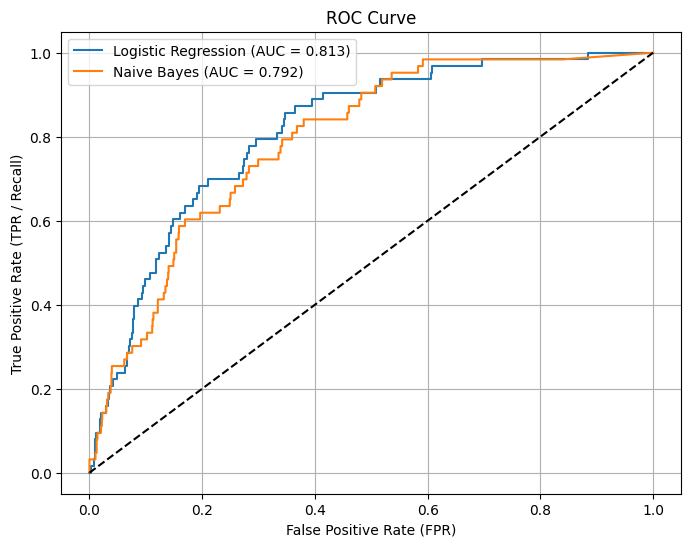

In [79]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.3f})')
plt.plot([0,1], [0,1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

##### Wnioski:
- Oba modele działają dobrze, jednak regresja logistyczna nieco przewyższa Naiwnego Bayesa w zdoloności do rozróżniania klas (AUC).
- Krzywe pokazują, że zmiana progu odcięcia wpłynie na TPR (recall) i FPR, co można dostosować w zależności od priorytetu.
- Im bliżej górnego lewego rogu wykresu, tym lepszy model – widać, że regresja logistyczna jest tu minimalnie bliżej tego punktu.

# Pytania:
#### Co to jest próg odcięcia?
Próg odcięcia to wartość graniczna prawdopodobieństwa, powyżej której model klasyfikuje obserwację do klasy pozytywnej. Można go zmieniać, a niższy próg zwiększa wykrywalność i wyższy poprawia precyzję.
#### Co to jest krzywa ROC i wartość AUC? W jaki sposób są one tworzone/obliczane?
Krzywa ROC pokazuje zależność między czułością (TPR) a odsetkiem fałszywych alarmów (FPR) dla różnych progów odcięcia.
Tworzy się ją, zmieniając próg i zapisując wartości TPR i FPR dla każdego z nich. AUC (Area Under Curve) to pole pod krzywą ROC. Mierzy ogólną zdolność modelu do rozróżniania klas. Im bliżej 1, tym lepszy model.

